# Decision trees - An example

# Import the dataset

In [6]:
import sklearn.datasets as datasets
import pandas as pd
import matplotlib.pyplot as plt

mydata=datasets.load_wine()
df=pd.DataFrame(mydata.data, columns=mydata.feature_names)
y=mydata.target

# Print dataset

In [7]:
print("* df.head()", df.head(), sep="\n", end="\n\n")
print("* df.tail()", df.tail(), sep="\n", end="\n\n")
print(mydata.target_names)

* df.head()
   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  
0      

# Decision tree classifier

In [8]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(max_depth=2)
dtree.fit(df,y)

DecisionTreeClassifier(max_depth=2)

# Visualize tree

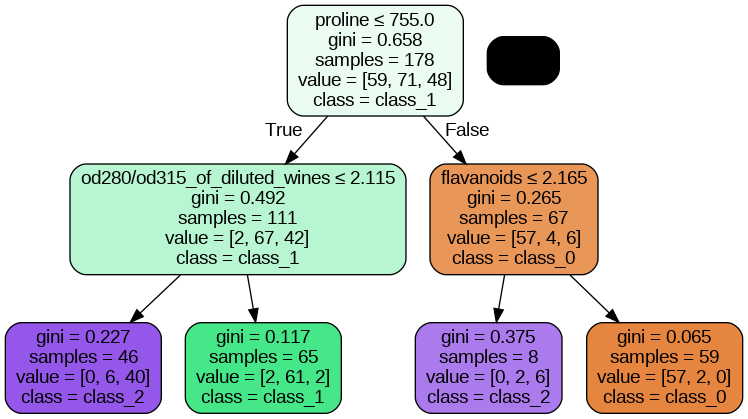

In [9]:
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,
                feature_names=mydata.feature_names,
                class_names=mydata.target_names,
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

Feature Importances:
alcohol: 0.0
malic_acid: 0.0
ash: 0.0
alcalinity_of_ash: 0.0
magnesium: 0.0
total_phenols: 0.0
flavanoids: 0.11779900380467834
nonflavanoid_phenols: 0.0
proanthocyanins: 0.0
color_intensity: 0.0
hue: 0.0
od280/od315_of_diluted_wines: 0.39637020553904034
proline: 0.48583079065628126


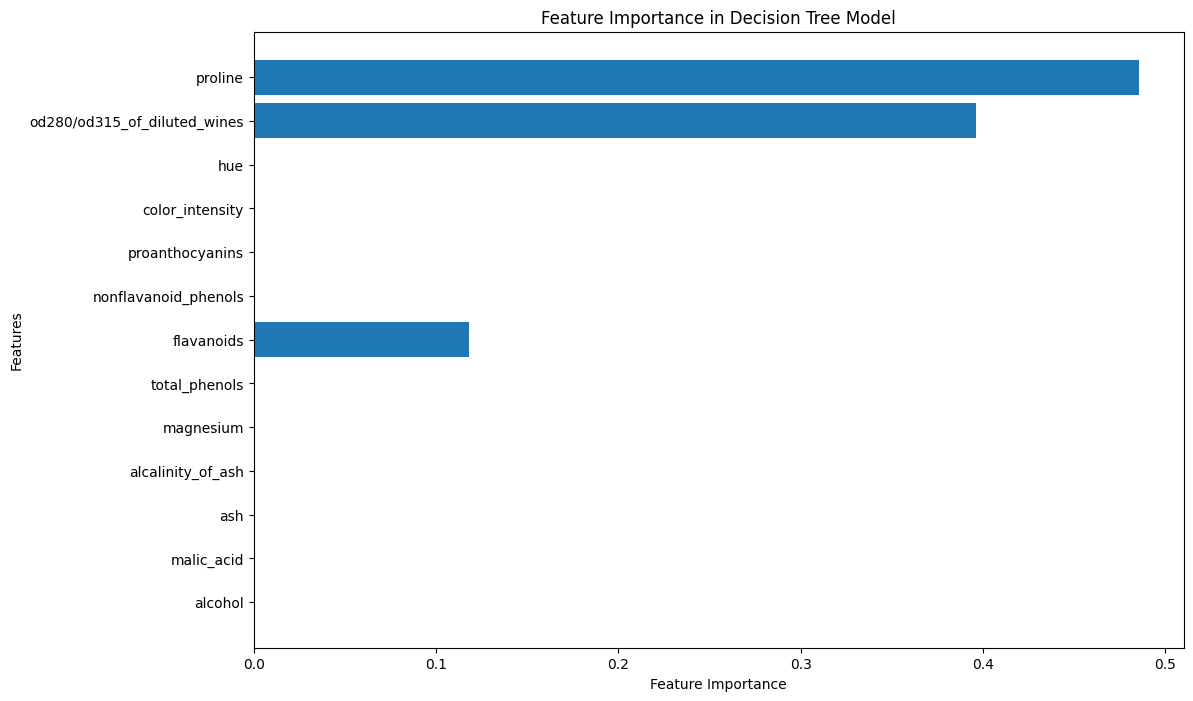

In [11]:
# Extracting feature importance
feature_importance = dtree.feature_importances_

# Getting feature names from the dataset
feature_names = mydata.feature_names

# Printing feature importance values
print("Feature Importances:")
for name, importance in zip(feature_names, feature_importance):
    print(f"{name}: {importance}")

# Creating a bar plot
plt.figure(figsize=(12, 8))
plt.barh(feature_names, feature_importance, align='center')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance in Decision Tree Model')
plt.show()